In [2]:
from torchvision.datasets import CelebA

train = CelebA("data", "train", download=True)
valid = CelebA("data", "valid", download=True)
test = CelebA("data", "test", download=True)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Number of pictures: 162770
Number of attributes: 40


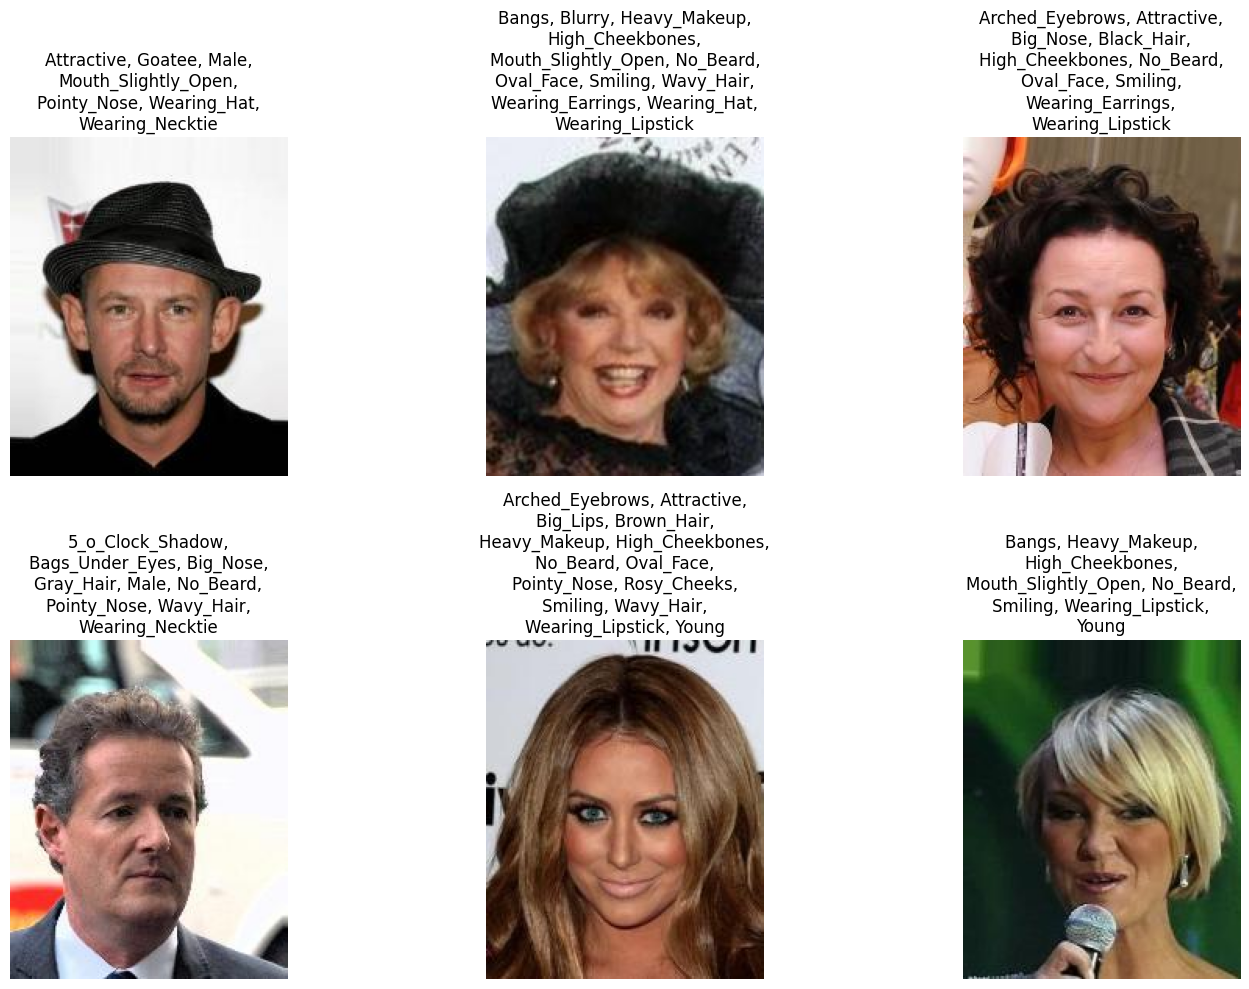

In [3]:
import matplotlib.pyplot as plt
import random
import textwrap

print(f"Number of pictures: {len(train)}")

print(f"Number of attributes: {len(train.attr_names[:-1])}")

# Define the number of rows and columns for the grid of images
ROWS = 2
COLS = 3

# Create subplots
fig, axs = plt.subplots(ROWS, COLS, figsize=(5*COLS, 5*ROWS))

# Randomly select images
selected_images = random.sample(range(len(train)), ROWS * COLS)

for i in range(ROWS * COLS):
    # Get attributes for the current image
    attrs = [attr for j, attr in enumerate(train.attr_names[:-1]) if train[selected_images[i]][1][j] == 1]
    
    # Calculate the row and column indices for the current image
    row = i // COLS
    col = i % COLS
    
    # Display the image
    axs[row, col].imshow(train[selected_images[i]][0])

    # Remove the axes
    axs[row, col].axis('off')
    
    # Set the title to the attributes, with line breaks
    title = ", ".join(attrs)
    axs[row, col].set_title(textwrap.fill(title, 30))

# Remove empty subplots
if ROWS * COLS > len(train):
    for i in range(len(train), ROWS * COLS):
        row = i // COLS
        col = i % COLS
        fig.delaxes(axs[row][col])

# Show the plot
plt.tight_layout()
plt.show()